# Clasificador Lineal

Este notebook es casi una copia del notebook de la clase 3 del curso de posgrado "Sistemas Dinamicos E Inteligencia Artificial Aplicados Al Modelado De Datos" de G. Mindlin dictado el segundo cuatrimestre de 2020

En esta notebook vamos entrenar un clasificador lineal para predecir qué tipo de objeto se encuentra en una imágen. 

Para ello vamos a trabajar con el dataset "fashion-mnist" (https://github.com/zalandoresearch/fashion-mnist). 



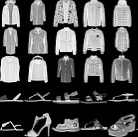

Este consta de 70000 imágenes de 28x28 píxeles en escala de grises divididas en 10 clases: 

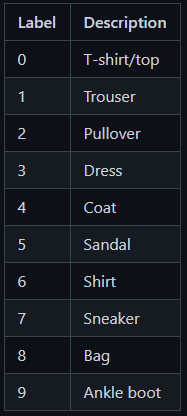

Pasos a seguir:
---

* Cargar el dataset

  El dataset está precargado en un módulo de la librería Keras, lo cargamos mediante le siguiente código:

  ```
  from keras.datasets import mnist,fashion_mnist

  (X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()
  ```
  
* Preparar los datos para el modelo

* Ajustar el modelo para predecir imagenes en el test y comparar con la predicción con el label real

# Cargamos el dataset

In [ ]:
# Cargamos las librerías típicas de python
import matplotlib.pyplot as plt # para plotear
import numpy as np              # numpy para los arrays
import seaborn as sb            # seaborn para plotear más lindo

In [ ]:
# Cargamos un módulo de la librería de Tensorflow que contiene el dataset fashion-mnist
from keras.datasets import mnist,fashion_mnist

(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()  # cargo los dataset de entrenamiento y testeo

# defino un vector de categorías donde el índice de cada elemento corresponde a la categoría asociada
categories = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


Una vez cargado el dataset fashion.mnist exploramos un poco los datos:

In [ ]:
# Vemos las formas de los objetos que cargamos y el tipo
print("X_train shape:", X_train_raw.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_raw.shape)
print("y_test shape:", y_test.shape)
print("X_train_raw dtype:",X_train_raw.dtype)
print("y_train_raw dtype:",y_train.dtype)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train_raw dtype: uint8
y_train_raw dtype: uint8


Vemos que tenemos 60000 entradas en el dataset de entrenamiento y 10000 en el de testeo (como esperábamos, HURRA!). Cada entrada tiene un shape de (28,28) es decir hay 28 elementos (filas) de 28 elementos cada uno (columnas)

Dos cosas a tener en cuenta:
1. ¿Qué significa (60000,28,28)?
2. el dtype de los elementos tiene formato "unit8" que luego vamos a querer transformar a "float32"

---
1 ¿Qué significa a.shape=(60000,28,28)? 
Podemos pensar que tenemos una Mamushka, para acceder a lo que está adentro tenemos que ir abriéndolas.

a[0] accede al primer elemento de los 60000 elementos que contiene a

a[0][0] accede al primer elemento de los 28 elementos del primer elemento de los 60000 elementos que contiene a

a[0][0][0] accede al primer elemento de los 28 elementos del primer elemento de los 28 elementos del primer elemento de los 60000 elementos que contiene a

Podemos pensar que cada elemento de los 60000 elementos de a es una matriz de 28x28. Esto parece "trivial" en este dataset pero si las imagenes fuesen a color tendríamos un shape (60000,28,28,3)

---
2 el dtype de los elementos tiene formato "unit8" que luego vamos a querer transformar a "float32"

```
y_train = y_train.astype("float32)
```



---
Veamos cómo se ven algunas de las imágenes y qué etiquetas les corresponden.

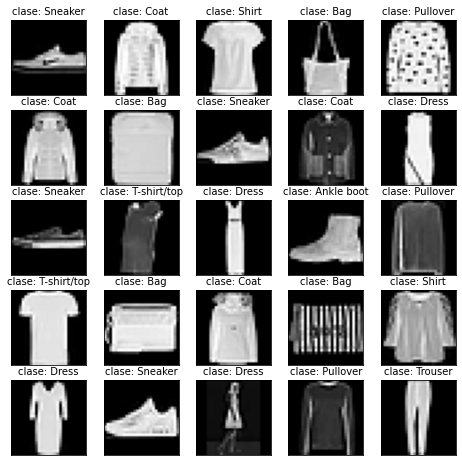

In [ ]:
# Ploteo 25 imagenes al azar del set de entrenamiento con sus respectivas clases
fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(25):
    j = np.random.randint(0, len(X_train_raw)) # en cada iteracion elijo un numero random entre 0 y la longitud de X_train_raw que es 60000 (el numero de imagenes) para usar de indice
    plt.subplot(5,5,i+1) # Voy a tener una matriz de 5x5 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(X_train_raw[j], interpolation='none', cmap="gray") # plotea una imagen random, pues es la imagen j-esima del set de entrenamiento, en formato (28,28) para imagenes en escala de grises
    plt.title("clase: {}".format(categories[y_train[j]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()

In [ ]:
X_train_raw[0].shape

(28, 28)

---
¿Cómo es la distribución de valores en la imagen?

Ploteo en un histograma la distribucion de los valores que toman los pixels para la primera imagen del dataset

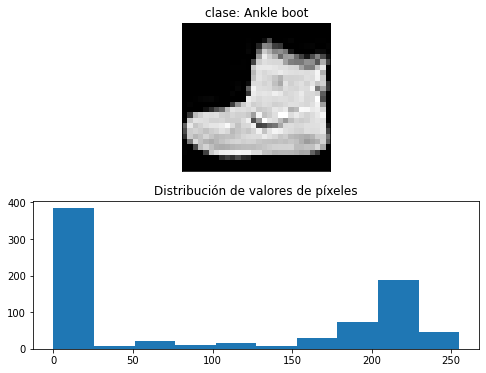

In [ ]:
fig = plt.figure(figsize = (8,6)) # seteo el tamano de la figura
plt.subplot(2,1,1) # hago el primer subplot de una figura con dos filas y una columna de plots
plt.imshow(X_train_raw[0], interpolation='none', cmap="gray")
plt.title("clase: {}".format(categories[y_train[0]]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train_raw[0].reshape(-1))
plt.title("Distribución de valores de píxeles")
plt.show()

# Preparamos los datos para entrenar el modelo

In [ ]:
print("Los valores de cada elemento de X_train_raw van entre ", np.min(X_train_raw), " y ", np.max(X_train_raw))

Los valores de cada elemento de X_train_raw van entre  0  y  255


In [ ]:
# reshapeamos para obtener un vector de 784 elementos (features) por cada imagen (samples)
X_train = X_train_raw.reshape(60000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones
X_test = X_test_raw.reshape(10000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones

X_train = X_train.astype('float32') # transformamos el tipo de datos a "float32"
X_test = X_test.astype('float32') # transformamos el tipo de datos a "float32"

# normalizamos por el maximo valor que pueden tener los pixels para que los valores queden entre 0 y 1
X_train = X_train/255.0
X_test = X_test/255.0

# print the final input shape ready for training
print("Matriz de entrenamiento shape", X_train.shape)
print("Matriz de testeo shape", X_test.shape)

Matriz de entrenamiento shape (60000, 784)
Matriz de testeo shape (10000, 784)


Veamos la variable "y" qué valores puede tomar y cuántas veces toma cada valor

In [ ]:
values,counts = np.unique(y_train, return_counts=True) # me fijo los valores sin repetir que toma el vector "y" y cuantas veces aparece cada uno con 'return_counts=True'
print("y_train")
print("Values:", values)
print("Counts:", counts)
print("y_test")
values,counts = np.unique(y_test, return_counts=True)
print("Values:", values)
print("Counts:", counts)

y_train
Values: [0 1 2 3 4 5 6 7 8 9]
Counts: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
y_test
Values: [0 1 2 3 4 5 6 7 8 9]
Counts: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


## One-Hot Encoding

Las etiquetas toman entonces valores de 0-9 pero es son datos categóricos, no ordinales. Entonces vamos a transformar este vector en una matriz donde cada columna representa una clase y los valores que toma son 0 si no pertenece a esa clase y 1 si pertenece a la clase.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # importo el modulo para crear el objeto OneHotEncoder

encoder = OneHotEncoder(sparse=False) # armamos el encoder. sparse=False nos devuelve una matriz comun a la que estamos acostumbrados (en vez de esparsa)
encoder.fit(y_train.reshape(-1,1)) # fiteo reshapeando el vector y_train como veníamos haciendo pues no tiene formato de matriz
print("Categorias del encoder:", encoder.categories_) # estas son las columnas binarias del nuevo encoding
Y_train = encoder.transform(y_train.reshape(-1,1)) # obtenemos la mariz binaria
print("Como queda la matriz Y_train:\n",Y_train)

print("y_train shape [antes de one-hot encoding]: ", y_train.shape)
print("Y_train shape [despues de one-hot encoding]: ", Y_train.shape)

# lo mismo para el dataset de testeo
encoder = OneHotEncoder(sparse=False) # armamos otro encoder. sparse=False nos devuelve una matriz comun a la que estamos acostumbrados (en vez de esparsa)
encoder.fit(y_test.reshape(-1,1)) # fiteo reshapeando el vector y_test como veníamos haciendo pues no tiene formato de matriz
Y_test = encoder.transform(y_test.reshape(-1,1)) # obtenemos la mariz binaria

Categorias del encoder: [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)]
Como queda la matriz Y_train:
 [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train shape [antes de one-hot encoding]:  (60000,)
Y_train shape [despues de one-hot encoding]:  (60000, 10)


# Entrenamos el modelo

El modelo que vamos a entrenar es la red neuronal más simple que tiene una única capa (layer). Esto sería equivalente a tener 10 perceptrones con 784 inputs y un único output. Cada perceptrón está encargado de clasificar si la imagen pertenece o no a esa clase en particular.

Igual que con sci-kit learn primero se define un objeto que es el modelo. Luego se agregan layers que definen la arquitectura de la red (que en este caso va a ser una única capa de 10 perceptrones). En esta instancia también podemos definir el tipo de activación del perceptrón (lineal, logística, etc) y el valor de regularización que vamos a utilizar (lasso, ridge, etc).


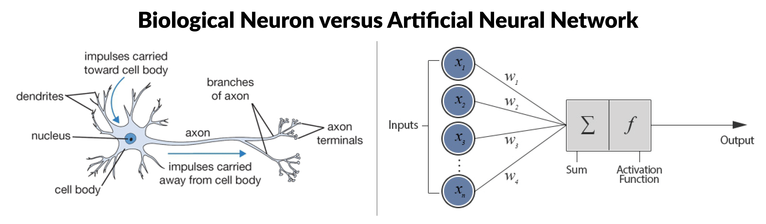

En general una red neuronal tiene esta pinta:

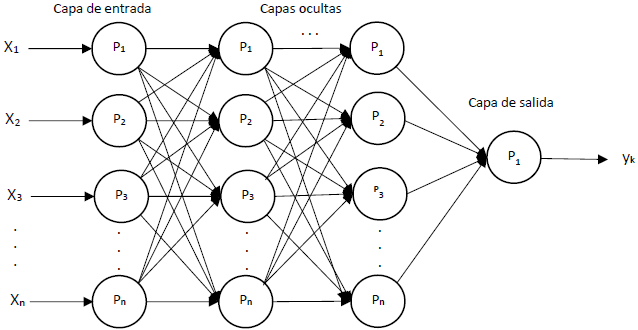

Sin embargo esta red neuronal simple posee una sola capa que es la capa de entrada, no tiene **capas ocultas**. En este ejemplo se ve que $P_1$ es el valor más grande de salida de los peceptrones, y le asignamos la etiqueta $y_k$ correspondiente a $P_1$ a la entrada (input X).

## importamos las librerías

In [ ]:
# Imports de utilidades de Python
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# Imports de Keras
from keras.datasets import mnist,fashion_mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils, plot_model
from keras.regularizers import l1

In [ ]:
# Definimos el modelo secuencial (primero esta vacio)
model_simple = Sequential()

# Agregamos una capa de 10 perceptrones con activación logística (softmax)
model_simple.add(Dense(10,activation='softmax')) 

# la función Dense() crea una capa de 10 nodos (perceptrones) que está fully connected, es decir que todas las entradas obtienen un peso para todos los nodos
# por lo que la cantidad de pesos en este caso sería 784x10 (784 pesos, uno por cada entrada del vector input para cada uno de los perceptrones)

Luego se compila el modelo. En este paso se determina cual será la función de costo, con que métricas vamos a monitorear el proceso y cual será el optimizador (generalmente, algún tipo de descenso por gradiente).

Este problema de clasificación que estamos resolviendo es un una problema multi-clase donde las clases son mutuamente excluyentes (solo se peude pertenecer a una de las clases). En este tipo de problemas se debe usar en la ultima capa de la red el tipo de activación `softmax`, y se suele elegir la `categorical_crossentropy` como función de costo a optimizar.

categorical_crossentropy:

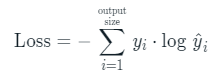

donde $y_i$ son las etiquetas reales y las $\hat{y_i}$ las predichas

In [ ]:
model_simple.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam')

Ahora sí, entrenamos la red

In [ ]:
history = model_simple.fit(X_train, Y_train,
          batch_size=32, epochs=10, # ignorar esto porque excede el contenido de la clase
          verbose=1, # para que nos vaya indicando por qué instancia de entrenamiento va
          validation_data=(X_test, Y_test)) # es análogo al .fit() de las regresiones que vimos en otras clases

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7780 - categorical_accuracy: 0.7411 - val_loss: 0.5129 - val_categorical_accuracy: 0.8200
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4690 - categorical_accuracy: 0.8404 - val_loss: 0.4832 - val_categorical_accuracy: 0.8326
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4355 - categorical_accuracy: 0.8504 - val_loss: 0.4788 - val_categorical_accuracy: 0.8367
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4220 - categorical_accuracy: 0.8540 - val_loss: 0.4615 - val_categorical_accuracy: 0.8381
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4131 - categorical_accuracy: 0.8584 - val_loss: 0.4508 - val_categorical_accuracy: 0.8435
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4018 - categorical_accuracy: 0.8631 - val_loss: 0.4547 - val_categorical_accuracy:

Ahora que el modelo ya está entrenado veamos que forma tien la salida. Para esto vamos a pedirle que nos prediga la primer instancia del test set por el modelo y ver qué da a la salida:

In [ ]:
salida = model_simple.predict(X_test[0:1]) # análogo al .predict_proba() que de sklearn

print('Shape de la salida:',salida.shape)
print('Salida:',salida)

Shape de la salida: (1, 10)
Salida: [[3.5061890e-07 2.3907633e-08 1.0852453e-05 4.4770081e-06 6.0638995e-06
  1.3536710e-01 4.8109152e-05 7.9607166e-02 6.9105257e-03 7.7804536e-01]]


In [ ]:
categories[9]

'Ankle boot'

Lo que tenemos a la salida es la probabilidad de pertenecia a cada una de las clases. Tomaremos que la clase asignada por la red es aquella con mayor valor. En este caso:

In [ ]:
ertiqueta_prediccion = salida[0].argmax() # me quedo con el índice que tiene el elemento de máximo valor 
etiquta_real = y_test[0] # me fijo cuál era la etiqueta real

print('Calse asignada por la red:', ertiqueta_prediccion)
print('Calse real:', etiquta_real)

Calse asignada por la red: 9
Calse real: 9


Para evaluar de manera generaal el resultado total vamos a calcular el accuracy sobre todo el set de entrenamiento y el todo el set de testeo:

nota: usamos accuracy porque vimos que las clases están balanceadas

In [ ]:
# Usamos el modelo para predecir sobre todas las instancias en ambos sets
y_train_pred = model_simple.predict(X_train)
y_test_pred = model_simple.predict(X_test)

# Tomamos como clase predicha aquella con mayor probabilidad
train_accuracy =  metrics.accuracy_score(y_train_pred.argmax(axis=1),y_train) 
# y_train_pred.argmax(axis=1) es un vector de longitud igual a la longitud de y_train_pred
# pero que en cada elemento tiene el número de clase con mayor probabilidad en vez de un vector con las 10 probabilidades
test_accuracy =  metrics.accuracy_score(y_test_pred.argmax(axis=1), y_test)

print('Accuracy en el train set:', train_accuracy)
print('Accuracy en el test set:', test_accuracy)

Accuracy en el train set: 0.86555
Accuracy en el test set: 0.8424


Veamos cómo es la matriz de confusión para casos con más de una clase

In [ ]:
from sklearn.metrics import confusion_matrix

print ("Matriz de confusion")
print(confusion_matrix(y_test, y_test_pred.argmax(axis=1)))

Matriz de confusion
[[781   1  15  60   4   0 128   0  11   0]
 [  3 953   5  29   5   0   4   0   1   0]
 [ 14   5 750  11  91   1 120   0   8   0]
 [ 15   8  12 898  22   0  42   0   3   0]
 [  0   1 144  51 650   0 147   0   7   0]
 [  0   0   0   1   0 933   0  43   2  21]
 [114   1 118  50  57   0 640   0  20   0]
 [  0   0   0   0   0  41   0 934   0  25]
 [  3   1   7  12   3   5  25   4 940   0]
 [  0   0   0   0   0  18   1  36   0 945]]


# Qué está mirando la red?

Al tener una red simple de una sola capa, podemos evaluar con presición cuales son las carácterísticas de las imagenes que la red está pesando para decidir si una imagen corresponde a o no a determinada clase. Esta información esta codificada en el peso que la red le asigna a cada pixel.

Podemos indagar el valor aprendido por la red apra los pesos mediante el metodo `get_weights()`:

In [ ]:
weigths = model_simple.get_weights()[0] # accedo a la matriz de pesos W de cada perceptrón
print(weigths.shape)

(784, 10)


Cada una de las 10 neuronas (uno por cada clase) tiene 784 pesos, uno por cada pixel de la imagen (sin contar los bias). La lectura del vector numérico de pesos no será muy informativa. Pero veamos que pasa si los llevamos a la forma (28,28) y los graficamos como una imagen.

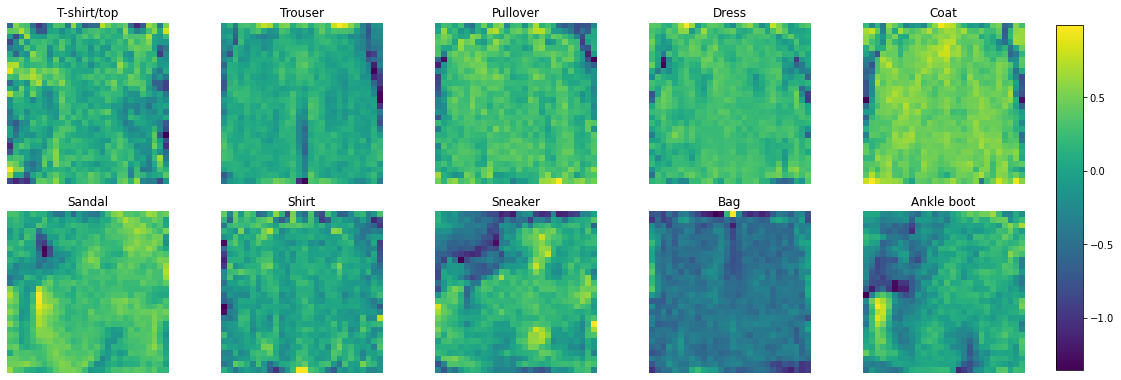

In [ ]:
plt.figure(figsize = (15,8)) # seteo el tamaño de la figura
for i in range(10): # i va desde 0 a 9 (range(10) es un vector que empieza en 0 y termina en 10-1=9 con steps de 1)
    plt.subplot(3,5,i+1) # hago subplots en 2 filas y 5 columnas
    w0 = weigths[:,i] # accedo a la matriz de pesos del perceptrón i-ésimo correspondiente a la clase i-ésima
    plt.title(categories[i]) # imprimo la categoría i-ésima correspondiente al i-ésimo perceptrón 
    plt.imshow(w0.reshape(28,28)) # reshapeo el vector de pesos i-ésimo (784,) a (28,28) para recuperar el formato de las imágenes
    plt.axis('off')
plt.tight_layout()
cax = plt.axes([1, 0.35, 0.025, 0.6])
plt.colorbar(cax=cax)
plt.show()
plt.show()

El color en las imágenes muestra la contribución positiva (amarillo) y negativa (violeta) del peso de cada pixel a cada una de las clases.

Se puede ver que 'trousers' (pantalones) tiene un perfil intuitivo al tener una línea oscura (ausencia de color en la imagen) en el centro que representa la seperación de las piernas. Tamibén se ve que 'Bag' (bolsa/bolso) tiene en una forma rectangular uniforme 

# Ejercicios optativos:

1. Agregar algún tipo de regularización y ver cómo cambian los pesos. Para agregar una regularización manteniendo una Red Neuronal Simple deberían borrar la capa que agregamos y agregar la que aquí se muestra para que cuando vuelvan a correr el código generen una red de capa única

```
# Agregamos una capa de 10 perceptriones con activación logística y  regularización de lasso con coeficiente 0.0005
model_simple.add(Dense(10, kernel_regularizer = l1(0.0005),activation='softmax'))
```

2. Comparar la precisión del train y test set en ambos casos

3. Mirando la matriz de confusión diga cuáles fueron las clases más difíciles de separar. ¿Es razonable?.